# Ex2 Use another table¶

Choose any of the other tables in 'databanken' to find interesting data.

1. Collect the data
2. Pose 5 or more interesing questions to the data
3. Answer the questions by aggregating the data
4. Illustrate the answers with visual plots


### Data table: FOLK1C
1. How many percent does Lithuanians make up of the Danish population?

In [18]:
url = 'https://api.statbank.dk/v1/data/FOLK1C/CSV?lang=en&delimiter=Semicolon&IELAND=5100%2C5611&OMR%C3%85DE=000&Tid=2020K1&HERKOMST=TOT'
df = pd.read_csv(url, delimiter=';')
df['TID'] = df['TID'].map(lambda x: int(x[:-2]))

pct = (df['INDHOLD'][1] / df['INDHOLD'][0]) * 100

print('Lithuanians make up {}% of the Danish population'.format(pct))

Lithuanians make up 0.30173893660451784% of the Danish population


2. How many Lithuanians are Immigrants and how many is Descendants
3. How many Lithuanians lives in DK vs CPH

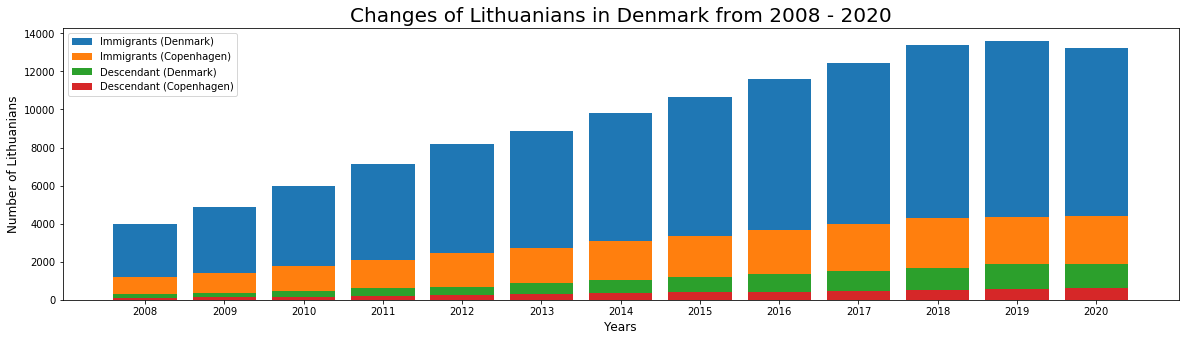

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://api.statbank.dk/v1/data/FOLK1C/CSV?lang=en&delimiter=Semicolon&OMR%C3%85DE=000%2C084&HERKOMST=4%2C3&IELAND=5611&Tid=2008K4%2C2009K4%2C2010K4%2C2011K4%2C2012K4%2C2013K4%2C2014K4%2C2015K4%2C2016K4%2C2017K4%2C2018K4%2C2019K4%2C2020K1'
df = pd.read_csv(url, delimiter=';')
df['TID'] = df['TID'].map(lambda x: int(x[:-2]))

data = np.array(df)

lithauen = {}
for l in data:
    if l[0] not in lithauen:
        lithauen[l[0]] = {}
    if l[1] not in lithauen[l[0]]:
        lithauen[l[0]][l[1]] = {}
    lithauen[l[0]][l[1]][l[3]] = l[4]

plt.figure(figsize=(20,5))

y_bar_dk_immigrants = lithauen['All Denmark']['Immigrants'].values()
y_bar_dk_descendant = lithauen['All Denmark']['Descendant'].values()
y_bar_cph_immigrants = lithauen['Region Hovedstaden']['Immigrants'].values()
y_bar_cph_descendant = lithauen['Region Hovedstaden']['Descendant'].values()
x_bar= lithauen['All Denmark']['Immigrants'].keys()

plt.xticks(list(x_bar))

plt.bar(x_bar, y_bar_dk_immigrants, label='Immigrants (Denmark)')
plt.bar(x_bar, y_bar_cph_immigrants, label='Immigrants (Copenhagen)')
plt.bar(x_bar, y_bar_dk_descendant, label='Descendant (Denmark)')
plt.bar(x_bar, y_bar_cph_descendant, label='Descendant (Copenhagen)')

plt.title('Changes of Lithuanians in Denmark from 2008 - 2020', fontsize=20)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Number of Lithuanians', fontsize=12)
plt.legend()